In [1]:

import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'point_history.csv'
model_save_path = 'Models\point_history_classifier\point_history_classifier.hdf5'


NUM_CLASSES = 5

TIME_STEPS = 16
DIMENSION = 2

x_df = pd.read_csv(dataset, usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)), dtype='float32')
y_df = pd.read_csv(dataset, usecols=[0], dtype='int32')

# mask = y_df['0'] != 4  # Create a boolean mask for labels not equal to 4

# # Filter both x_df and y_df using the mask
# x_df = x_df[mask]
# y_df = y_df[mask]


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.75, random_state=RANDOM_SEED)


In [3]:

use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 16, 2)             0         
                                                                 
 dropout (Dropout)           (None, 16, 2)             0         
                                                                 
 lstm (LSTM)                 (None, 16)                1216      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.6

In [4]:
'''
ModelCheckpoint:
cp_callback saves the model or weights during training at certain
intervals, which is particularly useful to prevent the loss of 
the model in case of a training interruption

EarlyStopping:
es_callback stops training when a monitored metric has stopped
improving, which helps to avoid overfitting
'''

cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# print(y_df['0'].unique())  # Replace 'label_column_name' with the actual name of your label column

In [7]:
model.fit(X_train,
          y_train,
          epochs=1000,
          batch_size=128,
          validation_data=(X_test, y_test),
          callbacks=[cp_callback, es_callback])

Epoch 1/1000
38/40 [===========================>..] - ETA: 0s - loss: 1.6078 - accuracy: 0.2691
Epoch 1: saving model to Models\point_history_classifier\point_history_classifier.hdf5
40/40 [==============================] - 2s 16ms/step - loss: 1.6077 - accuracy: 0.2699 - val_loss: 1.6033 - val_accuracy: 0.2587
Epoch 2/1000
27/40 [===================>..........] - ETA: 0s - loss: 1.6048 - accuracy: 0.2355

c:\Users\safda\anaconda3\envs\computervision_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/40 [============================>.] - ETA: 0s - loss: 1.6042 - accuracy: 0.2410
Epoch 2: saving model to Models\point_history_classifier\point_history_classifier.hdf5
40/40 [==============================] - 0s 6ms/step - loss: 1.6042 - accuracy: 0.2410 - val_loss: 1.5998 - val_accuracy: 0.2827
Epoch 3/1000
38/40 [===========================>..] - ETA: 0s - loss: 1.6001 - accuracy: 0.2681
Epoch 3: saving model to Models\point_history_classifier\point_history_classifier.hdf5
40/40 [==============================] - 0s 6ms/step - loss: 1.6002 - accuracy: 0.2693 - val_loss: 1.5939 - val_accuracy: 0.2899
Epoch 4/1000
36/40 [==========================>...] - ETA: 0s - loss: 1.5929 - accuracy: 0.2828
Epoch 4: saving model to Models\point_history_classifier\point_history_classifier.hdf5
40/40 [==============================] - 0s 6ms/step - loss: 1.5931 - accuracy: 0.2821 - val_loss: 1.5815 - val_accuracy: 0.3067
Epoch 5/1000
35/40 [=========================>....] - ETA: 0s - loss: 1.5784 

In [8]:
# print(y_df['0'].unique())  # Replace '0' with the actual name of your label column

In [9]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)


14/14 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8637


In [10]:
model = tf.keras.models.load_model(model_save_path)
predict_result = model.predict([X_test.iloc[0].values.reshape(1, 32)])
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 313ms/step
[1.4636979e-10 1.2904567e-08 2.8033623e-05 4.5124784e-01 5.4872411e-01]
4


53/53 [==============================] - 0s 1ms/step


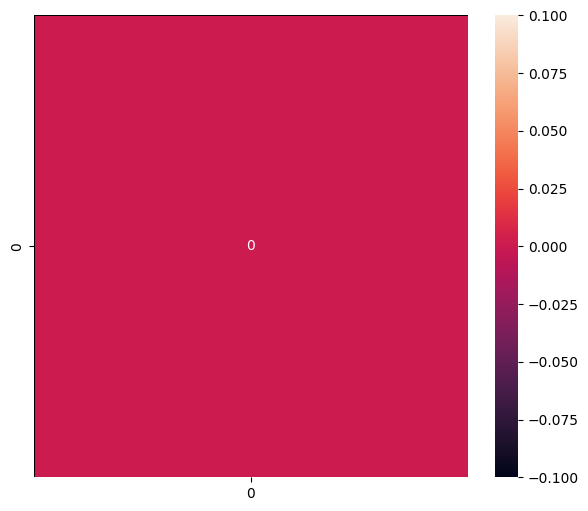

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       390
           1       0.99      0.98      0.99       308
           2       0.99      0.99      0.99       307
           3       0.67      0.82      0.74       316
           4       0.78      0.54      0.64       345

    accuracy                           0.86      1666
   macro avg       0.87      0.86      0.86      1666
weighted avg       0.87      0.86      0.86      1666



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


def print_confusion_matrix(y_true, y_pred, report=True):
    y_true = y_true.astype(int) 
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False,linewidths=0.5, linecolor='black')
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [12]:
model.save(model_save_path, include_optimizer=False)

c:\Users\safda\anaconda3\envs\computervision_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
'''
TensorFlow Lite (TFLite) is a lightweight, cross-platform library
designed to run machine learning models on mobile and edge devices.
specifically optimized for low-latency inference on resource-constrained 
environments like mobile phones, embedded systems, and IoT devices.
'''

tflite_save_path = 'Models/point_history_classifier/point_history_classifier.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, 
                                       tf.lite.OpsSet.SELECT_TF_OPS]

# Disable experimental lowering of TensorList operations
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\safda\AppData\Local\Temp\tmpb6823862\assets


INFO:tensorflow:Assets written to: C:\Users\safda\AppData\Local\Temp\tmpb6823862\assets


13488

In [15]:

interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()   # This prepares the interpreter to run inference by allocating memory for the input and output tensors

In [16]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [17]:
interpreter.set_tensor(input_details[0]['index'], np.array(X_test.iloc[0].values.reshape(1, 32)))


In [18]:
%%time
#invoke tensorflow lite and store the results
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


CPU times: total: 0 ns
Wall time: 3.29 ms


In [19]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3502067e-10 2.0477787e-08 2.6222870e-05 4.7063896e-01 5.2933478e-01]
4
